In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle

In [7]:
mnist = datasets.load_digits()

In [8]:
x = mnist.data
y = mnist.target

In [9]:
x[0].shape

(64,)

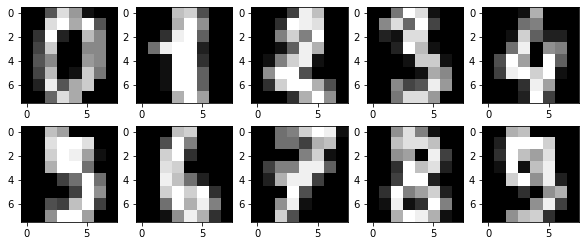

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,4))

for i, ax in enumerate(axes.flat):
    ax.imshow(x[i].reshape(8,8), cmap='gray')

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state=42)

In [43]:
best_acc = 0
best_k = 0
for i in range(1,15,2):
    model = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    acc = accuracy_score(y_val, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_k = i

model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
acc = accuracy_score(y_val, y_pred)
assert(best_acc == acc)


In [46]:
model_filename = 'knn.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model,file)

In [52]:
with open(model_filename, 'rb') as file:
    var = pickle.load(file)

In [56]:
y_pred  = var.predict(x_val)
acc = accuracy_score(y_val, y_pred)
assert(best_acc == acc)
print(acc)

0.9933333333333333
